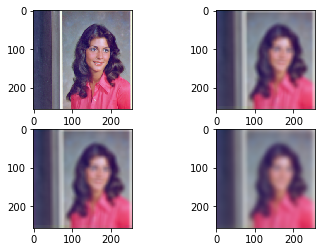

In [7]:
#high pass components are noise and edges
#LPF can accomplish blurring, denoising and blurring
#LPF
import cv2
import matplotlib.pyplot as plt
import numpy as np
path = "C:\\Users\\rangr\\Desktop\\Image Processing\\misc\\"
img1p = path + "4.1.04.tiff"
img1 = cv2.imread(img1p)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

box = cv2.boxFilter(img1, -1, (13,13)) #matrix size
blur = cv2.blur(img1, (13,13))
gaussian = cv2.GaussianBlur(img1, (37,37), 0)

image = [img1, box, blur, gaussian]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(image[i])

plt.show()

# Median Blur to get rid of salt and pepper noise

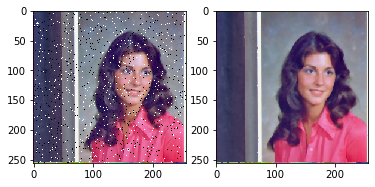

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
path = "C:\\Users\\rangr\\Desktop\\Image Processing\\misc\\"
img1p = path + "4.1.04.tiff"
img1 = cv2.imread(img1p)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

rows, columns, channels = img1.shape

noisy = np.zeros(img1.shape, np.uint8)
p = 0.05
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        r = random.random()
        if r < p/2:
            noisy[i][j] = [0, 0, 0]  #Pepper
        elif r < p:
            noisy[i][j] = [255, 255, 255] #Salt
        else:
            noisy[i][j] = img1[i][j]

            
denoised = cv2.medianBlur(noisy, 3)
images = [noisy, denoised]
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i])
    
plt.show()

# High Pass Filter

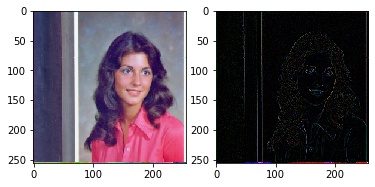

In [24]:
#Used for edge detection
#Laplacian HPF

import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
path = "C:\\Users\\rangr\\Desktop\\Image Processing\\misc\\"
img1p = path + "4.1.04.tiff"
img1 = cv2.imread(img1p)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

edges = cv2.Laplacian(img1, -1, ksize = 1, scale = 1, delta=0,
                      borderType = cv2.BORDER_DEFAULT)
#img, depth, kernel size, scaling, delta is constant to be added

images = [img1, edges]
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i])
    
plt.show()

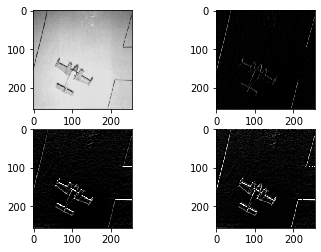

In [35]:
#Sobel HPF
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
path = "C:\\Users\\rangr\\Desktop\\Image Processing\\misc\\"
img1p = path + "5.1.11.tiff"
img1 = cv2.imread(img1p)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

edgesx = cv2.Sobel(img1, -1, dx = 1, dy = 0, ksize = 1, scale = 1, delta = 0,
                      borderType = cv2.BORDER_DEFAULT) #vertical edges

edgesy = cv2.Sobel(img1, -1, dx = 0, dy = 1, ksize = 3, scale = 1, delta = 0,
                      borderType = cv2.BORDER_DEFAULT) #horizontal edges

edges = edgesx + edgesy

images = [img1, edgesx, edgesy, edges]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap = 'gray')
    
plt.show()

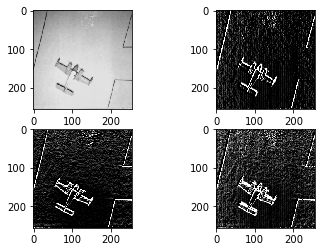

In [36]:
#Scharr HPF
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
path = "C:\\Users\\rangr\\Desktop\\Image Processing\\misc\\"
img1p = path + "5.1.11.tiff"
img1 = cv2.imread(img1p)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

edgesx = cv2.Scharr(img1, -1, dx = 1, dy = 0, scale = 1, delta = 0,
                      borderType = cv2.BORDER_DEFAULT) #vertical edges

edgesy = cv2.Scharr(img1, -1, dx = 0, dy = 1, scale = 1, delta = 0,
                      borderType = cv2.BORDER_DEFAULT) #horizontal edges

edges = edgesx + edgesy

images = [img1, edgesx, edgesy, edges]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap = 'gray')
    
plt.show()